In [29]:
#Kaggle link: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/data?select=portfolio_data.csv

In [30]:
import pandas as pd
import os
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
plt.style.use('fivethirtyeight')

In [31]:
# df = web.DataReader('AAPL', data_source='yahoo', start='2021-01-01', end='2021-09-01')
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [32]:
print(df.describe())
print(df.shape)

              High          Low         Open        Close        Volume  \
count  2003.000000  2003.000000  2003.000000  2003.000000  2.003000e+03   
mean     31.798525    31.238634    31.519792    31.527449  2.384275e+08   
std      12.507078    12.308627    12.398193    12.419818  1.875556e+08   
min      14.271429    13.753571    13.856071    13.947500  4.544800e+07   
25%      21.662499    21.228750    21.441607    21.492857  1.104316e+08   
50%      28.504999    27.915001    28.205000    28.230000  1.747996e+08   
75%      41.484999    40.531250    40.961250    40.992500  2.992836e+08   
max      70.442497    69.699997    69.892502    70.102501  1.506120e+09   

         Adj Close  
count  2003.000000  
mean     29.523361  
std      12.795978  
min      12.152316  
25%      18.624002  
50%      26.091917  
75%      39.260998  
max      69.177261  
(2003, 6)


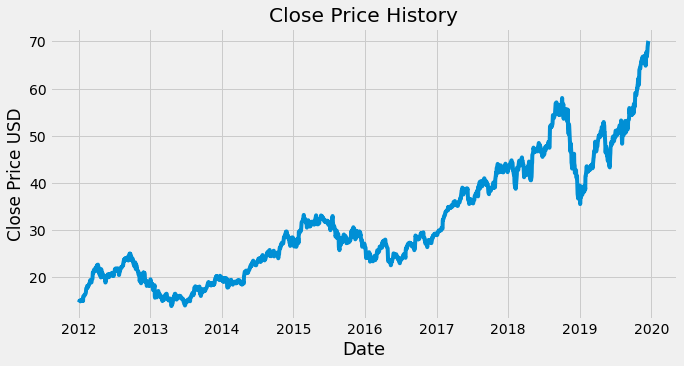

In [33]:
plt.figure(figsize=(10,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD')
plt.show()


In [34]:
#Process the data

data = df.filter(['Close'])

print('Data shape: ', data.shape)
#Define training portion
train_ratio = 0.8
train_length = math.ceil(train_ratio * len(data))
test_length = len(data) - train_length
print('Training ratio: ', train_length)
print('Test ratio: ', test_length)
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data)

print(scaled_data)




Data shape:  (2003, 1)
Training ratio:  1603
Test ratio:  400
[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [35]:

#Create a training dataset
train_data = scaled_data[0: train_length, :]
x_train = []
y_train = []

batch = 60

for i in range(batch, len(train_data)):
    x_train.append(train_data[i - batch: i, 0])
    y_train.append(train_data[i])
    
    if i == batch + 1: 
        print(x_train)
        print(y_train)
        
#Convert to numpy array
x_train, y_train = np.array(x_train ), np.array(y_train)


[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805]), array([0.01457063, 0.01748985, 0.02026915, 0.01984303, 0.02080338,
       0.02036454, 0.01962679, 0.01862191, 0.02173194, 0.02453668,
       0.02367172, 0.01893355, 0.02345548, 0.01900352, 0.03

In [36]:
print('Original train shape ', x_train.shape)
print('Original Train label shape ', y_train.shape)
#Reshape the data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print("Train shape ", x_train.shape)


Original train shape  (1543, 60)
Original Train label shape  (1543, 1)
Train shape  (1543, 60, 1)


In [37]:
#Building the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#Compile
model.compile(optimizer='adam', loss='mean_squared_error')



In [38]:
epochs = 1

#Train the model
model.fit(x_train, y_train, batch_size = 1, epochs = epochs)

Epoch 1/1
1543/1543 [==============================] - 259s 168ms/step - loss: 9.3706e-04


In [39]:
print(data.shape)

#Create test dataset
test_data = scaled_data[train_length - batch:, :]

x_test = []
y_test = data.values[train_length: , :]
for i in range(batch, len(test_data)):
    x_test.append(test_data[i - batch: i, 0])

#Convert to numpy and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test.shape)

(2003, 1)
(400, 60, 1)


In [42]:
#Make predictions

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

print(predictions.shape)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(rmse)

(400, 1)
1.6470155728101554


                Close  Predictions
Date                              
2018-05-17  46.747501    47.619541
2018-05-18  46.577499    47.692318
2018-05-21  46.907501    47.705406
2018-05-22  46.790001    47.724838
2018-05-23  47.090000    47.732941


/Users/nguyen/opt/anaconda3/envs/pytorch_hack/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


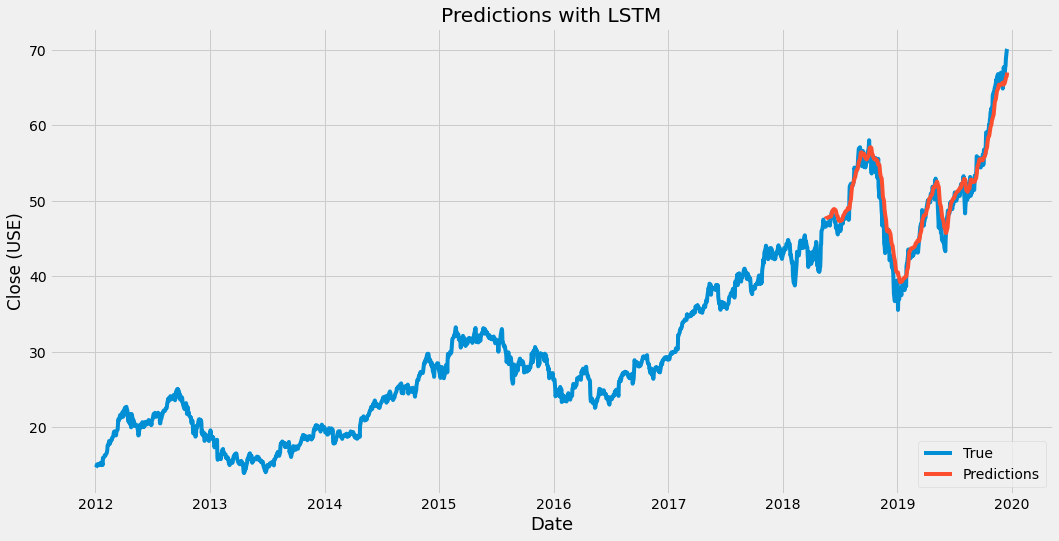

In [41]:
#Plot the predictions
train = data[:train_length]
valid = data[train_length: ]
valid['Predictions'] = predictions

print(valid[:5])

plt.figure(figsize=(16,8))
plt.title('Predictions with LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close (USE)')
plt.plot(data)
plt.plot(valid[['Predictions']])
plt.legend(['True', 'Predictions'], loc='lower right')

plt.show()